# Comparación de casas caras

In [5]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib.colors import Normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

### Datos a usar

In [7]:
# Cargar los datos
train_data = pd.read_csv('../../train.csv')

# Crear la variable de respuesta categórica
# Definir umbral
umbral_precio = train_data['SalePrice'].quantile(0.60)

# Crear la variable binaria
train_data['IsExpensive'] = (train_data['SalePrice'] > umbral_precio).astype(int)

# Preparar los datos
# Seleccionar las características más importantes identificadas previamente
selected_features = [
    'OverallQual',    # Calidad general
    'GrLivArea',      # Área habitable
    'GarageCars',     # Capacidad del garaje
    'YearBuilt',      # Año de construcción
    'TotalBsmtSF',    # Superficie total del sótano
    'FullBath'        # Baños completos
]

X = train_data[selected_features].copy()
y = train_data['IsExpensive']

# Normalizar/estandarizar las características para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

### Creación de modelos
Copy - paste de los modelos creados anteriormente

#### Árbol de clasificación

In [8]:
dt_classifier = DecisionTreeClassifier(
    max_depth=7,             # Profundidad máxima del árbol
    min_samples_split=20,    # Mínimo de muestras para dividir un nodo
    min_samples_leaf=10,     # Mínimo de muestras en un nodo hoja
    random_state=42
)

start = time.time()
dt_classifier.fit(X_train, y_train)
tiempo_entrenamiento_dt = time.time() - start

# Evaluar el modelo
y_predDT = dt_classifier.predict(X_test)

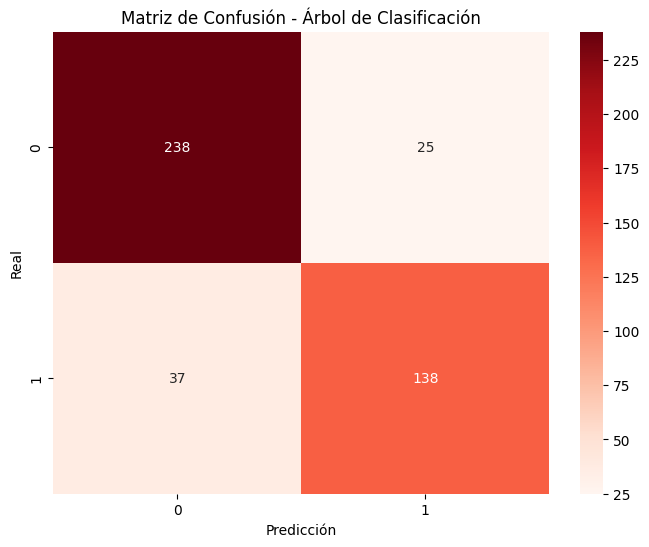

In [28]:
cm = cm = confusion_matrix(y_test, y_predDT)
# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Árbol de Clasificación")
plt.show()

#### Random Forest

In [30]:
rf_classifier = RandomForestClassifier(
    n_estimators=1000,        # Número de árboles en el bosque
    max_depth=7,             # Profundidad máxima de los árboles
    min_samples_split=20,    # Mínimo de muestras para dividir un nodo
    min_samples_leaf=10,     # Mínimo de muestras en un nodo hoja
    random_state=42,
    n_jobs=-1                # Usar todos los núcleos disponibles para mayor rendimiento
)

start = time.time()
rf_classifier.fit(X_train, y_train)
tiempo_entrenamiento_rf = time.time() - start

# Evaluar el modelo
y_predRF = rf_classifier.predict(X_test)

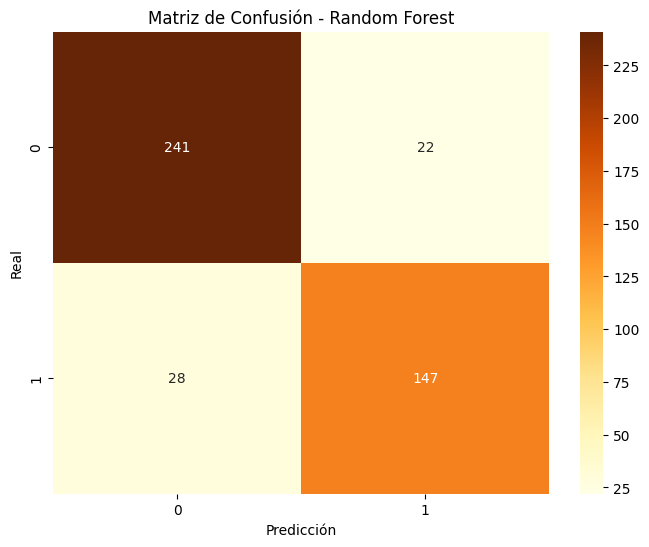

In [31]:
cm = cm = confusion_matrix(y_test, y_predRF)
# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='YlOrBr', fmt='d')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

#### Naive Bayes

In [33]:
gaussian_nb = GaussianNB(var_smoothing = 1e-05)
start = time.time()
gaussian_nb.fit(X_train, y_train)
tiempo_entrenamiento_nb = time.time() - start

y_predNB = gaussian_nb.predict(X_test)

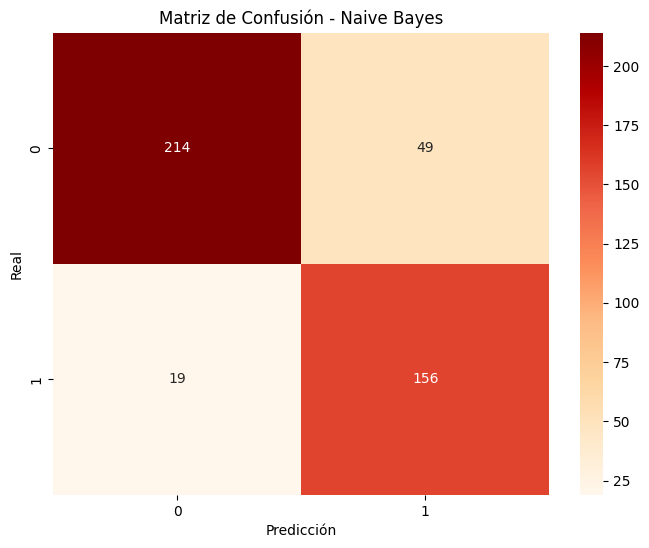

In [34]:
cm = cm = confusion_matrix(y_test, y_predNB)
# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='OrRd', fmt='d')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Naive Bayes")
plt.show()

#### Regresión Logística

In [36]:
# Crear y entrenar el modelo
log_reg = LogisticRegression(solver='liblinear', random_state=42)
start = time.time()
log_reg.fit(X_train, y_train)
tiempo_entrenamiento_lg = time.time() - start

# Realizar predicciones
y_predLR = log_reg.predict(X_test)

In [39]:
cm = confusion_matrix(y_test, y_predNB)
print(cm)
print(tiempo_entrenamiento_lg)

[[214  49]
 [ 19 156]]
0.02339315414428711


## Comparación

C:\Users\Fabi\AppData\Local\Temp\ipykernel_2244\1198189214.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='Tiempo (s)', data=df_tiempos, ax=axes[0], palette='viridis')
C:\Users\Fabi\AppData\Local\Temp\ipykernel_2244\1198189214.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='Error', data=df_results, ax=axes[1], palette='coolwarm_r')


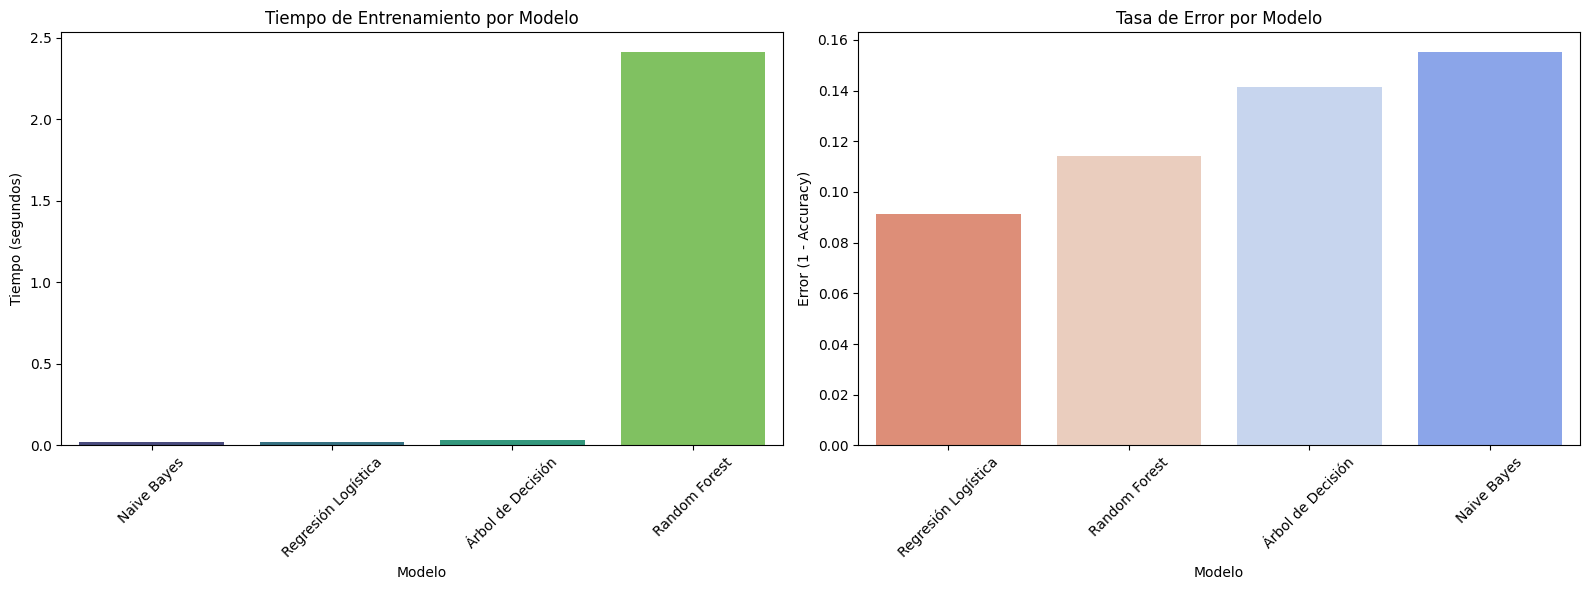


COMPARACIÓN DE TIEMPOS DE ENTRENAMIENTO:
             Modelo  Tiempo (s)
        Naive Bayes    0.019521
Regresión Logística    0.023393
  Árbol de Decisión    0.035580
      Random Forest    2.413028

COMPARACIÓN DE PRECISIÓN:
             Modelo  Accuracy    Error  Total Errores  F1-Score
Regresión Logística  0.908676 0.091324             40  0.886364
      Random Forest  0.885845 0.114155             50  0.854651
  Árbol de Decisión  0.858447 0.141553             62  0.816568
        Naive Bayes  0.844749 0.155251             68  0.821053

RESULTADOS:
Modelo más rápido: Naive Bayes (0.0195 segundos)
Modelo con menos errores: Regresión Logística (Error: 0.0913, Total errores: 40)
Modelo con más errores: Naive Bayes (Error: 0.1553, Total errores: 68)


In [37]:
# Crear un DataFrame para comparar tiempos de entrenamiento
tiempos = {
    'Modelo': ['Regresión Logística', 'Árbol de Decisión', 'Random Forest', 'Naive Bayes'],
    'Tiempo (s)': [tiempo_entrenamiento_lg, tiempo_entrenamiento_dt, tiempo_entrenamiento_rf, tiempo_entrenamiento_nb]
}
df_tiempos = pd.DataFrame(tiempos)
df_tiempos = df_tiempos.sort_values('Tiempo (s)')

# Calcular métricas para cada modelo
modelos = {
    'Regresión Logística': y_predLR,
    'Árbol de Decisión': y_predDT,
    'Random Forest': y_predRF,
    'Naive Bayes': y_predNB
}

# Calcular errores (1 - accuracy) y aciertos
results = []
for nombre, predicciones in modelos.items():
    accuracy = accuracy_score(y_test, predicciones)
    error = 1 - accuracy
    total_errors = np.sum(predicciones != y_test)
    f1 = f1_score(y_test, predicciones)
    
    results.append({
        'Modelo': nombre,
        'Accuracy': accuracy,
        'Error': error,
        'Total Errores': total_errors,
        'F1-Score': f1
    })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values('Error')

# Visualizar resultados
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de tiempos
sns.barplot(x='Modelo', y='Tiempo (s)', data=df_tiempos, ax=axes[0], palette='viridis')
axes[0].set_title('Tiempo de Entrenamiento por Modelo')
axes[0].set_ylabel('Tiempo (segundos)')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de errores
sns.barplot(x='Modelo', y='Error', data=df_results, ax=axes[1], palette='coolwarm_r')
axes[1].set_title('Tasa de Error por Modelo')
axes[1].set_ylabel('Error (1 - Accuracy)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Mostrar tablas de resultados
print("\nCOMPARACIÓN DE TIEMPOS DE ENTRENAMIENTO:")
print(df_tiempos.to_string(index=False))

print("\nCOMPARACIÓN DE PRECISIÓN:")
print(df_results[['Modelo', 'Accuracy', 'Error', 'Total Errores', 'F1-Score']].to_string(index=False))

# Identificar el modelo más rápido y el más preciso
modelo_mas_rapido = df_tiempos.iloc[0]['Modelo']
modelo_mas_preciso = df_results.iloc[0]['Modelo']
modelo_menos_preciso = df_results.iloc[-1]['Modelo']

print("\nRESULTADOS:")
print(f"Modelo más rápido: {modelo_mas_rapido} ({df_tiempos.iloc[0]['Tiempo (s)']:.4f} segundos)")
print(f"Modelo con menos errores: {modelo_mas_preciso} (Error: {df_results.iloc[0]['Error']:.4f}, Total errores: {df_results.iloc[0]['Total Errores']})")
print(f"Modelo con más errores: {modelo_menos_preciso} (Error: {df_results.iloc[-1]['Error']:.4f}, Total errores: {df_results.iloc[-1]['Total Errores']})")